Displaying outs



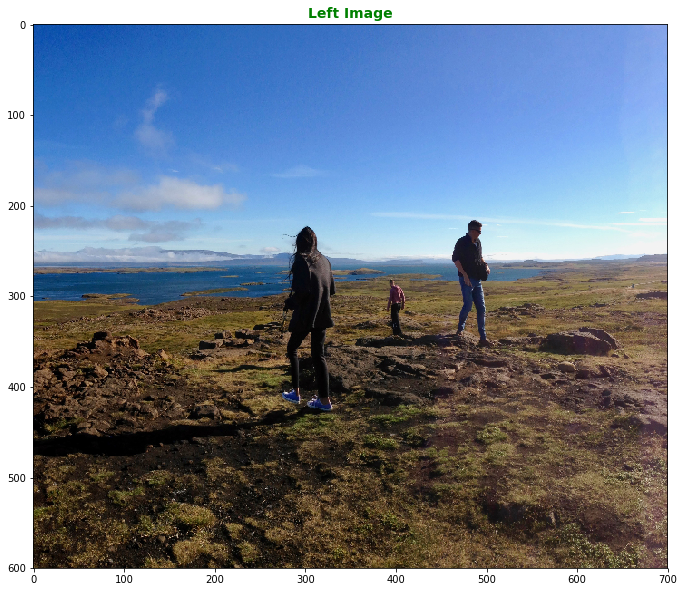

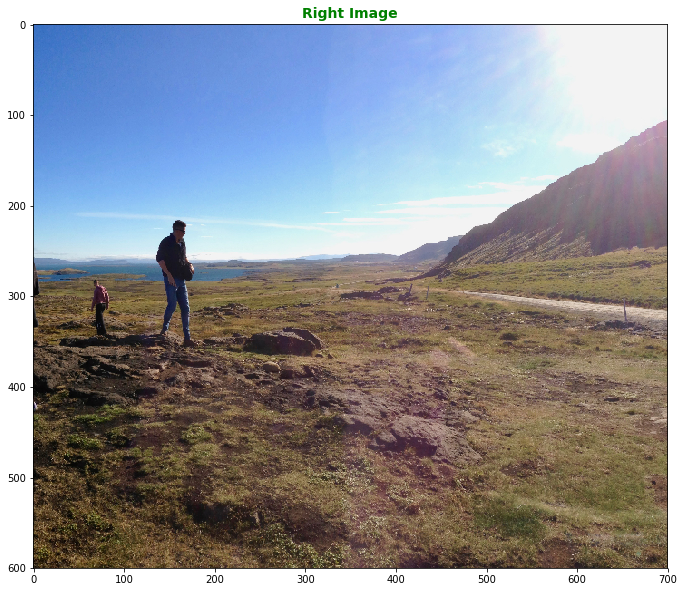

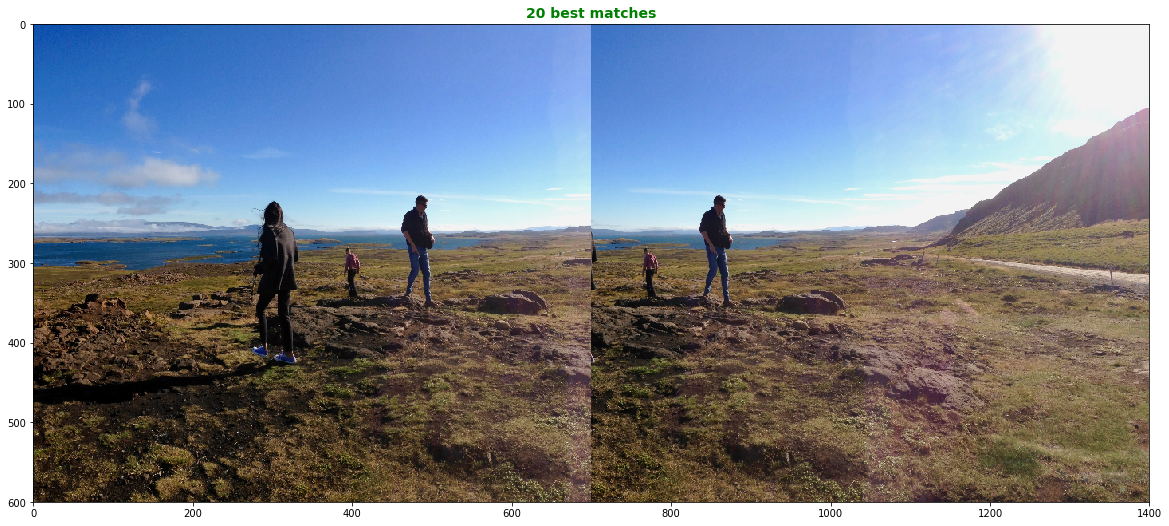

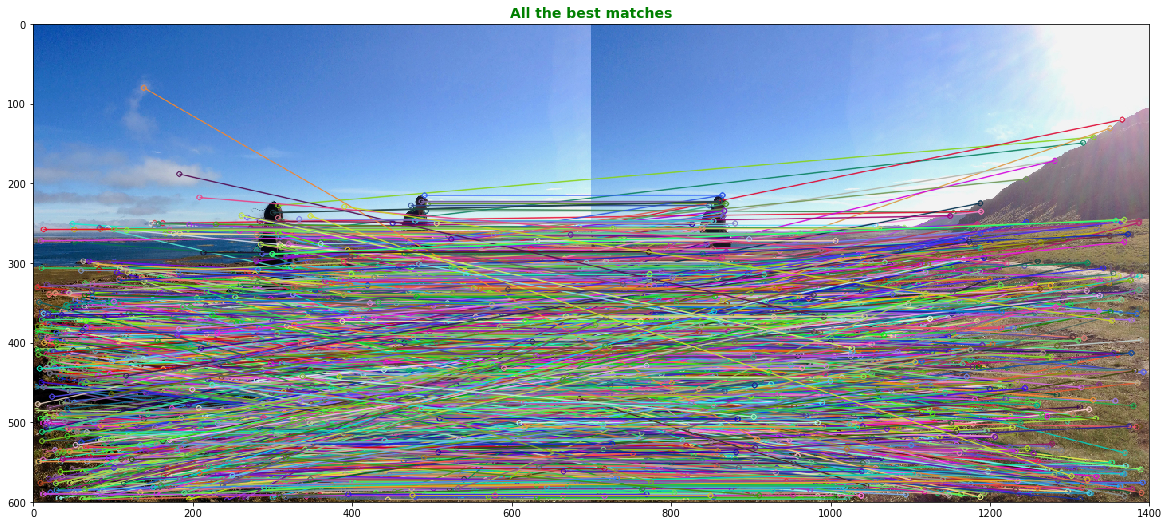

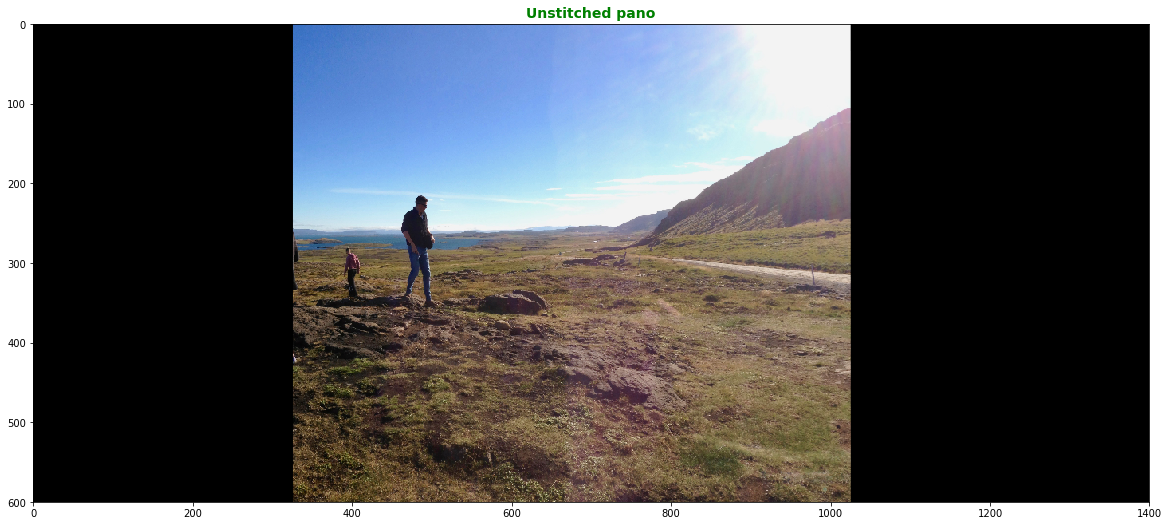

In [15]:
"""
    NOTES:
    CITATIONS: 
        -MCgill OpenCV Tutorial Code for the Ransac and ouput limits functions
"""
'''
    LIBRARIES
'''
from tqdm import tnrange
from time import sleep
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
'''
    MAGIC VARIABLES
'''
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
'''
    HELPER FUNCTIONS
'''

class Panorama:
    DEBUG = True
    outputImages = []
    kp1 = []
    des1 = []
    kp2 = []
    des2 = []
    matches = []
    homographyMatrix = []
    finalShape = (0,0)

    def resizeImage(self, image, dbug=DEBUG):
        if dbug:
            image = cv2.resize(image, (700, 600))
#             image = cv2.resize(image, (120, 160))
            # image = cv2.resize(image, (1920, 2560))
        else:
            image = cv2.resize(image, (700, 600))
        return image

    def displayImage(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)

    def displayImages(self, images):
        print("Displaying outs")
        for im in images:
            ima = im[0]
            ima = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.title(im[1], fontsize=14, fontweight='bold', color="green")
            plt.imshow(ima)

    def getTopMatches(self, matches):
        bestMatches = []
        for m in matches:
            if m.distance < 0.75:
                bestMatches.append((m))
        return sorted(bestMatches, key=lambda x: x[1].distance, reverse=False)[:20]

    '''
        ASSIGNMENT FUNCTIONS
    '''

    def getSiftMatches(self):
        sift_1, sift_2 = cv2.xfeatures2d.SIFT_create(), cv2.xfeatures2d.SIFT_create()
        self.kp1, self.des1 = sift_1.detectAndCompute(self.imL, None)
        self.kp2, self.des2 = sift_2.detectAndCompute(self.imR, None)

        # Then find the matches between the images
        bf = cv2.BFMatcher()
        self.matches = bf.match(self.des1, self.des2)

        # then find the top  matches for a nice drawing
        bMatches = self.getTopMatches(self.matches)
        newIm10 = cv2.drawMatches(self.imL, self.kp1, self.imR, self.kp2, bMatches, None, flags=2)
        newImAll = cv2.drawMatches(self.imL, self.kp1, self.imR, self.kp2, self.matches, None, flags=2)
        self.outputImages.append((newIm10, "20 best matches"))
        self.outputImages.append((newImAll, "All the best matches"))

    def getPanoImages(self, pathL, pathR):
        if self.DEBUG:
            self.imL = self.resizeImage(cv2.imread(pathL))
            self.imR = self.resizeImage(cv2.imread(pathR))
        else:
            self.imL = cv2.imread(pathL)
            self.imR = cv2.imread(pathR)
        self.outputImages.append((self.imL, "Left Image"))
        self.outputImages.append((self.imR, "Right Image"))

    def getHomographyMatrix(self):
        # First we need to get the coordinates of points that match in the 2 images
        srcCoords = np.zeros((len(self.matches), 2))
        dstCoords = np.zeros((len(self.matches), 2))

        for idx in range(len(self.matches)):
            srcIdx, dstIdx = self.matches[idx].queryIdx, self.matches[idx].trainIdx
            srcCoords[idx] = self.kp1[srcIdx].pt
            dstCoords[idx] = self.kp2[dstIdx].pt

        # Finally compute the homography
        self.homographyMatrix, mask = cv2.findHomography(dstCoords, srcCoords, cv2.RANSAC, 5.0)

    def computePanoDetails(self):
        '''
        We need to know the shape of the new output image in order to solve our problem
        Use the sum of widths of 2 images and then the height of the second image
        :return:
        '''
        shp1 = self.imL.shape
        shp2 = self.imR.shape
        self.finalShape = (shp1[1] + shp2[1], shp1[0])

    def laplacianBlend(self):
        '''
            This will blend two images together
        '''
        #First compute the laplacian pyramid for each image
        
        #Then find the Gaussian pyramid on the weight image
        
        #Blend Laplacians from each image using Gaussian blurred weights
        
        #Reconstruct final image
        
        
    def warpImages(self):
        #First apply the warping function on the right image
        self.rightWarped = cv2.warpPerspective(self.imR,self.homographyMatrix,self.finalShape)
        self.outputImages.append((self.rightWarped,"Unstitched pano"))
    
    def finalStitch(self):
        #then place the right image on the left image
        panorama[0:self.imR.shape[0], 0:self.imR.shape[1]] = self.imL

        #Then display our panorama!!
        self.outputImages.append((panorama,"Final panorama"))


    def main(self):
        t = tnrange(6, desc='Bar desc', leave=True)

        # First read the images as input
        t.set_description("Reading the landscape images")
        t.update(1)
        self.getPanoImages("./images/landscapeL.jpg", "./images/landscapeR.jpg")

        # Then compute the sift descriptors and matches
        t.set_description("Get sift features and calculate matches")
        t.update(1)
        self.getSiftMatches()

        # Then get the homography matrix
        t.set_description("Get homography matrix")
        t.update(1)
        self.getHomographyMatrix()

        # Then get the final image details
        t.set_description("Get final image details")
        t.update(1)
        self.computePanoDetails()

        #Then do a warping transformation on the images using this matrix
        t.set_description("Warping the right image onto the left image")
        t.update(1)
        self.warpImages()
        
        t.set_description("Applying the Laplacian blending of the image")
        t.update(1)
        self.laplacianBlend()

        # Finally display all of the output images
        t.set_description("Displaying the output images")
        t.update(1)
        self.displayImages(self.outputImages)


p = Panorama()
p.main()


# TQDM EXAMPLE

In [6]:
from tqdm import tnrange, tqdm_notebook
import time
# for i in tnrange(2, desc='1st loop'):
#     for j in tqdm_notebook(range(100), desc='2nd loop'):
#         time.sleep(0.01)
                
t = tnrange(10, desc='Bar desc')

t.set_description("Reading the landscape images")
t.refresh()
for i in range(10):
    
    t.update(1)
    time.sleep(1)


0/|/Reading the landscape images:   0%|| 0/10 [00:00<?, ?it/s]

In [11]:
import numpy as np

a = [1,2,3]
b = [[1,2,3],[4,5,6],[7,8,9]]

a = np.array(a)
b = np.array(b)

print a
print b

dotP = np.dot(b,a)
print dotP

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[14 32 50]
